# Credicxo Machine Learning Task

Data Source: https://drive.google.com/file/d/1pZhzZnaPi74aKCQImSPrzrTxWzVeE0qv/view?usp=sharing

The dataset is available in .csv forms

### Data Information
The given dataset contains details about organic chemical compounds including their chemical features, isomeric conformation,  names and the classes in which they are classified. The compounds are classified as either ‘Musk’ or ‘Non-Musk’ compounds. 

 Number of records : 6598
 
 Number of Attributes/Columns in data: 170

### Attribute Information:

1. ID               : unique id
2. molecule_name    : name of the molecule
3. conformation_name: unique name 
4. class  and etc.  : binary class(0 or 1)

### Objective:

Given a record, determine whether the record is Musk (1) or Non-Musk (0).

### Action Plan

#### 1. Undersatnd the data
- Datatypes of features

   - 166 features have 'int64' and 2 have 'object'
   
- Description of data(unique, max, min, mean, count and etc)
   
   - 102 types of molecules
   
   - NON-MUSK-j146 comes 1044 times
   
- Checking the data (Balanced or Imbalanced)

   - Imbalanced
   
   - class '1' is minority(1017)
   
- Describe the features

   - scatter plot, pdf, box-plot

#### 2.Pre-processing
- Null Value :  No Null values

- Duplicate rows  : No duplicate rows

- Duplicate features/columns  : No duplicate features

- Single value in columns across all rows : No single value

- Converting categorical features into one hot encoding(molecule_name)

- Standardized the data

#### 3. Train- Test split
- 80:20 ratio train-test split

- 5278 records in Train and 1320 in Test set

#### 4. Model

-  Uses Xgboost 
  - The test log loss is: 0.05
  - The Test accuracy of the xgbdt classifier is 98.33%
  - F1 Score:  0.9458
  
- 2 layer Neural network with 32 neurons in each layer
  - Test Loss: 1.7620610411871562e-05
  - Test Accuracy: 0.999
  - F1 Score:  1.0

## Importing Libraries

In [49]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import time
import xgboost as xgb
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from xgboost import plot_importance
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

## Loading Data

In [2]:
data = pd.read_csv('musk_csv.csv')
data.head()

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,...,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,...,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,...,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,137,168,-60,-135,80,1


## Understanding the data

In [3]:
# Total no of records
print(data.shape)

(6598, 170)


 There are 6598 records and 168 variables or features(excluding ID and class)

In [4]:
#Number of column in our data
print(data.columns)

Index(['ID', 'molecule_name', 'conformation_name', 'f1', 'f2', 'f3', 'f4',
       'f5', 'f6', 'f7',
       ...
       'f158', 'f159', 'f160', 'f161', 'f162', 'f163', 'f164', 'f165', 'f166',
       'class'],
      dtype='object', length=170)


In [5]:
# Information about datatypes of columns
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6598 entries, 0 to 6597
Columns: 170 entries, ID to class
dtypes: int64(168), object(2)
memory usage: 8.6+ MB
None


168 columns have datatype as 'int64'  and 2 have datatype as 'object'

In [6]:
# describe all colmns
data.describe(include='all')

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
count,6598.00000,6598,6598,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,...,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000
unique,NaN,102,6598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NON-MUSK-j146,j147_1+87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1044,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3299.50000,NaN,NaN,58.945135,-119.128524,-73.146560,-0.628372,-103.533495,18.359806,-14.108821,...,-184.798272,-75.795696,-26.073204,64.616702,112.037739,201.760230,-47.488330,-150.259927,41.770233,0.154138
std,1904.82287,NaN,NaN,53.249007,90.813375,67.956235,80.444617,64.387559,80.593655,115.315673,...,107.819514,127.861271,69.727964,100.861935,72.835040,59.526751,55.069365,76.019023,94.116085,0.361108
min,1.00000,NaN,NaN,-31.000000,-199.000000,-167.000000,-114.000000,-118.000000,-183.000000,-171.000000,...,-328.000000,-219.000000,-136.000000,-120.000000,-69.000000,73.000000,-289.000000,-428.000000,-471.000000,0.000000
25%,1650.25000,NaN,NaN,37.000000,-193.000000,-137.000000,-70.000000,-117.000000,-28.000000,-159.000000,...,-272.000000,-205.000000,-70.000000,-18.000000,71.000000,166.000000,-68.000000,-179.000000,-9.000000,0.000000
50%,3299.50000,NaN,NaN,44.000000,-149.000000,-99.000000,-25.000000,-117.000000,33.000000,27.000000,...,-234.000000,-131.000000,-21.000000,61.500000,107.000000,191.000000,-60.000000,-150.000000,27.000000,0.000000
75%,4948.75000,NaN,NaN,53.000000,-95.000000,-19.000000,42.000000,-116.000000,74.000000,57.000000,...,-80.000000,52.000000,9.000000,149.000000,129.000000,215.000000,-45.000000,-120.000000,119.000000,0.000000


#### There are 102 types of molecules. NON-MUSK-j146 comes 1044 times

### Checking Data Balanced or Imbalanced

0    5581
1    1017
Name: class, dtype: int64


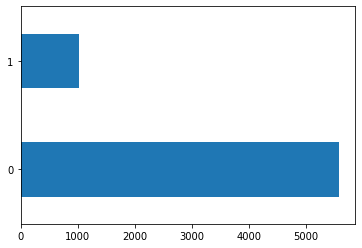

In [9]:
print(data['class'].value_counts())
data['class'].value_counts()[:2].plot(kind='barh')

 #### The dataset is imbalanced, class 1 is minority.

NON-MUSK-j146    1044
NON-MUSK-252     1010
NON-MUSK-j147     911
NON-MUSK-f146     383
NON-MUSK-288      344
                 ... 
NON-MUSK-290        2
MUSK-300            2
NON-MUSK-j130       2
NON-MUSK-j97        1
NON-MUSK-j96        1
Name: molecule_name, Length: 102, dtype: int64


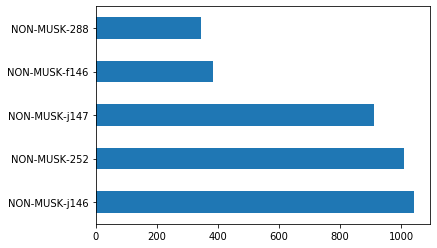

In [10]:
print(data['molecule_name'].value_counts())
data['molecule_name'].value_counts()[:5].plot(kind='barh')

### Scatter Plot

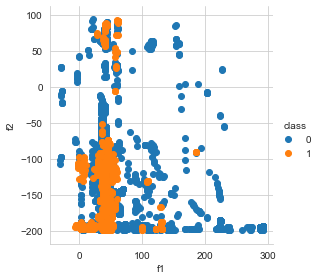

In [50]:
sns.set_style("whitegrid");
sns.FacetGrid(data, hue="class", size=4) \
   .map(plt.scatter, "f1", "f2") \
   .add_legend();
plt.show();

#### If f1 is above 200 and less than 0 then records belongs to the class 0

### PDF

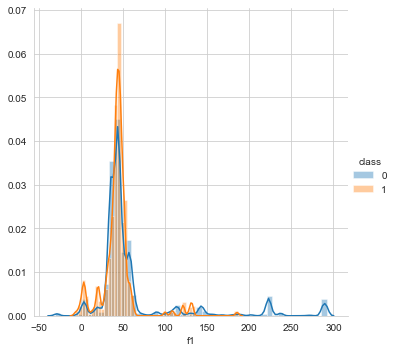

In [12]:
sns.FacetGrid(data, hue="class", size=5) \
   .map(sns.distplot, "f1") \
   .add_legend();
plt.show();

### Box-PLOT

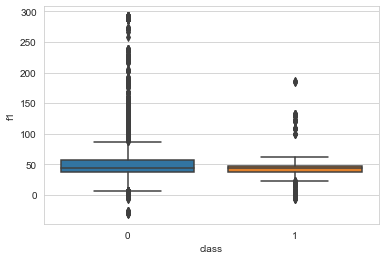

In [13]:
sns.boxplot(x='class',y='f1', data=data)
plt.show()

## Pre-processing

### Check for Null values

In [14]:
data.isnull().values.any()

False

There are no Null values

### Check for Duplicate records

In [15]:
df = data.copy()
del df['ID']   
del df['class']
print(df.shape)

(6598, 168)


In [16]:
print('Before check',df.shape)
df =df.drop_duplicates()
print('After Check',df.shape)

Before check (6598, 168)
After Check (6598, 168)


There are no duplicate records.

### Check for duplicate columns

In [17]:
df =df.T.drop_duplicates().T
df.shape

(6598, 168)

### Check for columns having same value across all rows

In [18]:
nunique = df.apply(pd.Series.nunique)
cols_to_drop = nunique[nunique == 1].index
print(cols_to_drop)
df = df.drop(cols_to_drop, axis=1)
df.shape

Index([], dtype='object')


(6598, 168)

There are no duplicates columns

### Coverting Categorical features into onehotencoding

In [19]:
data.loc[:, data.dtypes == object]

,molecule_name,conformation_name
0,MUSK-211,211_1+1
1,MUSK-211,211_1+10
2,MUSK-211,211_1+11
3,MUSK-211,211_1+12
4,MUSK-211,211_1+13
...,...,...
6593,NON-MUSK-jp13,jp13_2+5
6594,NON-MUSK-jp13,jp13_2+6
6595,NON-MUSK-jp13,jp13_2+7
6596,NON-MUSK-jp13,jp13_2+8


#### All values in 'conformation_name' is unique, so model will not learn anything from it. So removed it/

In [20]:
del df['conformation_name']

In [21]:
molecule_name_dummies = pd.get_dummies(df.molecule_name)
del df['molecule_name']
new_df = pd.concat([df, molecule_name_dummies], axis=1)
new_df.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,NON-MUSK-j81,NON-MUSK-j83,NON-MUSK-j84,NON-MUSK-j90,NON-MUSK-j96,NON-MUSK-j97,NON-MUSK-jf18,NON-MUSK-jf79,NON-MUSK-jp10,NON-MUSK-jp13
0,46,-108,-60,-69,-117,49,38,-161,-8,5,...,0,0,0,0,0,0,0,0,0,0
1,41,-188,-145,22,-117,-6,57,-171,-39,-100,...,0,0,0,0,0,0,0,0,0,0
2,46,-194,-145,28,-117,73,57,-168,-39,-22,...,0,0,0,0,0,0,0,0,0,0
3,41,-188,-145,22,-117,-7,57,-170,-39,-99,...,0,0,0,0,0,0,0,0,0,0
4,41,-188,-145,22,-117,-7,57,-170,-39,-99,...,0,0,0,0,0,0,0,0,0,0


### Converting all features into same scale

In [22]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
df_train = sc_X.fit_transform(new_df)

### Train-Test-Split(80:20)

In [23]:
from sklearn.model_selection import train_test_split,StratifiedKFold
X_train, X_test, y_train, y_test = train_test_split(df_train, data['class'], test_size = 0.20, random_state = 123) # create four variable

print("Number of training examples :", X_train.shape[0], "and each row is of shape (%d)"%(X_train.shape[1]))
print("Number of testing examples :", X_test.shape[0], "and each row is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 5278 and each row is of shape (268)
Number of testing examples : 1320 and each row is of shape (268)


In [24]:
# This function plots the confusion matrices
def plot_confusion_matrix(y_test, y_predict):
    C = confusion_matrix(y_test, y_predict)
    # C = 2,2 matrix, each cell (i,j) represents number of points of class i are predicted class j
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]         
    # representing A in heatmap format
    
    cmap=sns.light_palette("green")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True,cmap=cmap,fmt=".2g",annot_kws={"ha": 'left',"va": 'top',"fontsize":12})
    plt.xlabel('Predicted Class',fontsize=12)
    plt.ylabel('Original Class',fontsize=12)
    plt.title("Confusion matrix",fontsize=12)
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True,cmap=cmap,fmt=".2g",annot_kws={"ha": 'left',"va": 'top',"fontsize":12})
    plt.xlabel('Predicted Class',fontsize=12)
    plt.ylabel('Original Class',fontsize=12)
    plt.title("Precision matrix",fontsize=12)
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True,cmap=cmap,fmt=".2g",annot_kws={"ha": 'left',"va": 'top',"fontsize":12})
    plt.xlabel('Predicted Class',fontsize=12)
    plt.ylabel('Original Class',fontsize=12)
    plt.title("Recall matrix",fontsize=12)
    
    plt.show()

## Training Model

### XGBoost Classifier

In [25]:
def tune_xgboost(x_train,y_train):
    start = time.time()
    xgb_clf = xgb.XGBClassifier(n_jobs = -1)
    random_parameters = {"n_estimators":[50,55,60,65,70,75,80],'learning_rate':[0.01,0.1,0.001],'reg_alpha':[1,0.1,0.01,0.001,0.05,0.005],
        'min_child_weight': [1, 3,5,7, 10,15],
        'gamma': [0.5, 1, 0,0.7],
        'subsample': [0.6,0.8, 1.0],
        'colsample_bytree': [0.6,0.8, 1.0],
        'max_depth': [3, 4, 5,7],
        'reg_lambda':[1,0.1,0.01,0.001,0.05,0.005]                 
        }
    randomSearchModel = RandomizedSearchCV(xgb_clf, random_parameters, cv=7,scoring='neg_log_loss')
    randomSearchModel.fit(x_train, y_train)
    print('Time taken in finding Parameter: ',(time.time() - start))
    return randomSearchModel.best_params_    

In [26]:
tune_xgboost(X_train,y_train)

Time taken in finding Parameter:  94.90979814529419


{'subsample': 0.6,
 'reg_lambda': 1,
 'reg_alpha': 0.1,
 'n_estimators': 65,
 'min_child_weight': 1,
 'max_depth': 4,
 'learning_rate': 0.1,
 'gamma': 0.7,
 'colsample_bytree': 0.6}

## Training model

### Accuracy and Loss

In [44]:
xgb_clf = xgb.XGBClassifier(n_estimators=60,subsample=0.6,min_child_weight=5,max_depth=7,learning_rate=0.1,gamma=0.5,colsample_bytree=1.0,reg_alpha=0.05,reg_lambda=1).fit(X_train,y_train)
pred = xgb_clf.predict(X_train)
# evaluate accuracy
acc = accuracy_score(y_train, pred) * 100
print('\nThe Train accuracy of the xgbdt classifier is %f%%' % (acc))
# predict the response
pred = xgb_clf.predict(X_test)
# evaluate accuracy
acc = accuracy_score(y_test, pred) * 100
print('\nThe Test accuracy of the xgbdt classifier is %f%%' % (acc))

predict_y = xgb_clf.predict_proba(X_train)
print("The train log loss is:",log_loss(y_train, predict_y, labels=xgb_clf.classes_, eps=1e-15))
predict_y = xgb_clf.predict_proba(X_test)
print("The test log loss is:",log_loss(y_test, predict_y, labels=xgb_clf.classes_, eps=1e-15))


The Train accuracy of the xgbdt classifier is 99.374763%

The Test accuracy of the xgbdt classifier is 98.333333%
The train log loss is: 0.039798361486024794
The test log loss is: 0.05970993431330884


### F1 Score

In [45]:
print("F1 Score: ",f1_score(y_test,pred))

F1 Score:  0.9458128078817735


### Confusion Matrix 

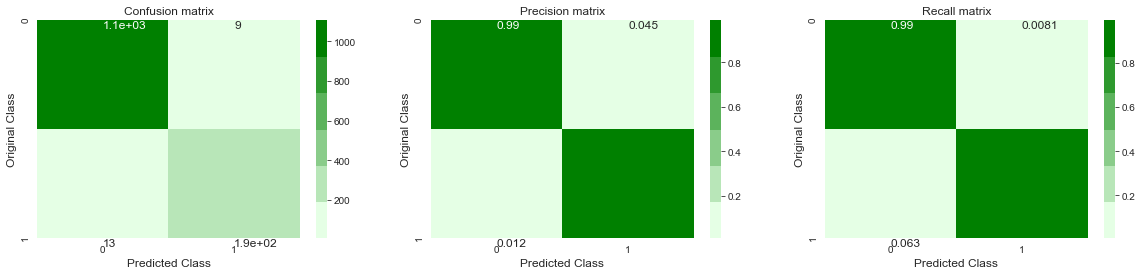

In [46]:
plot_confusion_matrix(y_test, pred)

### Classification Report

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1115
           1       0.96      0.94      0.95       205

    accuracy                           0.98      1320
   macro avg       0.97      0.96      0.97      1320
weighted avg       0.98      0.98      0.98      1320



### Saving Model using pickle

In [31]:
import pickle
file_name = "tuned_xgb.pkl"
# save
pickle.dump(xgb_clf, open(file_name, "wb"))

# -----------------------------------------------------------------------------------------------------

#  Neural Network

### Importing Libraries

In [48]:
from keras.utils import np_utils 
import tensorflow as tf
from tensorflow.keras.initializers import RandomNormal
from tensorflow.keras import backend
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,BatchNormalization,Dropout

In [33]:
Y_train = np_utils.to_categorical(y_train, 2)    #one hot encoding
Y_test = np_utils.to_categorical(y_test, 2)

print("After converting the output into a vector : ",y_train[0])

After converting the output into a vector :  1


In [34]:
# some model parameters
output_dim = 2
input_dim = X_train.shape[1]
batch_size = 16
epochs = 100

## Model Architecture

## 2 Hidden layer  + BatchNormalization + Dropout

In [35]:
model = Sequential()
# Layer 1   
model.add(Dense(32, activation='relu', input_shape=(input_dim,)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
# layer 2
model.add(Dense(32, activation='relu', ))
model.add(BatchNormalization())
model.add(Dropout(0.5))
# relu classifier
model.add(Dense(output_dim, activation='relu'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                8608      
_________________________________________________________________
batch_normalization (BatchNo (None, 32)                128       
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32)                128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 6

### Compile and fit model

In [36]:
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')
mcp_save = tf.keras.callbacks.ModelCheckpoint('.mdl_wts.hdf5', save_best_only=True, monitor='val_loss', mode='min')
#reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7, verbose=1, epsilon=1e-4, mode='min')

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=100, verbose=1,callbacks=[earlyStopping, mcp_save], validation_split=0.1)

Train on 4750 samples, validate on 528 samples
Epoch 1/100
4750/4750 [==============================] - 4s 782us/sample - loss: 5.0879 - accuracy: 0.5606 - val_loss: 2.0687 - val_accuracy: 0.7869
Epoch 2/100
4750/4750 [==============================] - 2s 359us/sample - loss: 4.0519 - accuracy: 0.6518 - val_loss: 1.5025 - val_accuracy: 0.8570
Epoch 3/100
4750/4750 [==============================] - 2s 409us/sample - loss: 3.3970 - accuracy: 0.7034 - val_loss: 1.4168 - val_accuracy: 0.8797
Epoch 4/100
4750/4750 [==============================] - 2s 435us/sample - loss: 2.9490 - accuracy: 0.7395 - val_loss: 1.3544 - val_accuracy: 0.8854
Epoch 5/100
4750/4750 [==============================] - 2s 465us/sample - loss: 2.6115 - accuracy: 0.7688 - val_loss: 1.1512 - val_accuracy: 0.9015
Epoch 6/100
4750/4750 [==============================] - 2s 501us/sample - loss: 2.3747 - accuracy: 0.7909 - val_loss: 0.9461 - val_accuracy: 0.9138
Epoch 7/100
4750/4750 [==============================] - 3s

### Training and Validation's Accuracy and Loss Graph

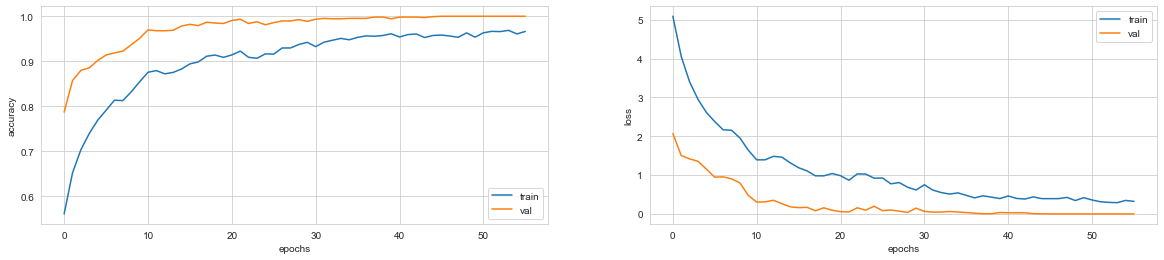

In [62]:
f = plt.figure(figsize=(20,4))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)

plt.subplot(1, 2, 1)
ax.plot(history.history['accuracy'])
ax.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train', 'val'], loc='lower right')


plt.subplot(1, 2, 2)
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])

plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

### Train-Test Loss and Accuracy

In [63]:
score = model.evaluate(X_train, Y_train, verbose=0) 
print('Train Loss:', score[0]) 
print('Train accuracy:', score[1])
print("-------------------------------------------------------------------")
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test Loss:', score[0]) 
print('Test Accuracy:', score[1])

Train Loss: 0.0002123081429172258
Train accuracy: 0.9999053
-------------------------------------------------------------------
Test Loss: 1.7620610411871562e-05
Test Accuracy: 1.0


In [64]:
pred = model.predict_classes(X_test)

### F1 Score

In [70]:
print("F1 Score: ",f1_score(y_test,pred))

F1 Score:  1.0


### Confusion Matrix

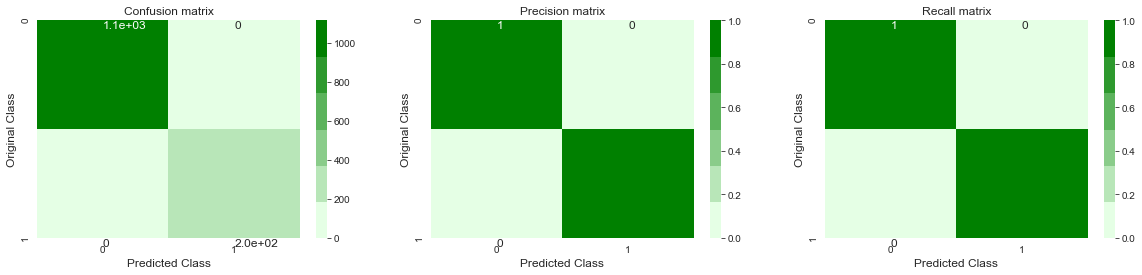

In [66]:
plot_confusion_matrix(y_test, pred)

### Classification report

In [67]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1115
           1       1.00      1.00      1.00       205

    accuracy                           1.00      1320
   macro avg       1.00      1.00      1.00      1320
weighted avg       1.00      1.00      1.00      1320



### Saving Model

In [68]:
model.save('NN_model.hdf5')

## Free Memory

In [71]:
del model,pred,y_test,X_test,Y_test,Y_train,df,data,X_train,xgb_clf,new_df,df_train